In [3]:
%cd /home/dyllanjr/Documents/Classification-M2/notebooks
from pyfuncs import processing
import pickle
import pandas as pd
from sklearn.metrics import classification_report, f1_score
from yellowbrick.classifier import classification_report as cf
import numpy as np

/home/dyllanjr/Documents/Classification-M2/notebooks


In [28]:
def load_trained_house_predict(file):
    '''Loads test data and returns ypred, ytrue'''
    %cd /home/dyllanjr/Documents/Classification-M2/notebooks/models/
    model = pickle.load(open(file, 'rb'))
    csvs = np.arange(101, 111)
    #unsampled csh's are 101, 105, 110
    del_csvs = np.array([101, 105, 110])
    csvs = np.setdiff1d(csvs, del_csvs)
    f1_scores = []
    for csv in csvs:
        X, y =  processing.load_house(csv)
        X = X.iloc[100100::] #have a bit of spacing between train and test set where possible data leakage
        y = y.iloc[100100::] #this is extracting the test set of the houses we modelled off of
        y_pred = model.predict(X)
        f1 = f1_score(y, y_pred, average='micro')
        f1_scores.append(f1)
    del model
    del X
    return np.mean(f1_scores)

In [30]:
load_trained_house_predict('forest_sample_trained.pkl')

/home/dyllanjr/Documents/Classification-M2/notebooks/models


0.7055027834032686

In [32]:
def load_trained_house_predict_holdout(file):
    '''Loads test data and returns ypred, ytrue'''
    %cd /home/dyllanjr/Documents/Classification-M2/notebooks/models/
    model = pickle.load(open(file, 'rb'))
    del_csvs = np.array([101, 105, 110])
    f1_scores = []
    for csv in del_csvs:
        X, y =  processing.load_house(csv)
        X = X.iloc[100100::] #have a bit of spacing between train and test set where possible data leakage
        y = y.iloc[100100::] #this is extracting the test set of the houses we modelled off of
        y_pred = model.predict(X)
        f1 = f1_score(y, y_pred, average='micro')
        f1_scores.append(f1)
    del model
    del X
    return np.mean(f1_scores)

In [33]:
load_trained_house_predict_holdout('forest_sample_trained.pkl')

/home/dyllanjr/Documents/Classification-M2/notebooks/models


0.5391663915726684

In [11]:
%cd /home/dyllanjr/Documents/Classification-M2/notebooks/models/
%ls

/home/dyllanjr/Documents/Classification-M2/notebooks/models
'GaussianNB().pkl'                  'LogisticRegression().pkl'
'GradientBoostingClassifier().pkl'   forest_sample_trained.pkl
'KNeighborsClassifier().pkl'         random_forest_baseline.joblib


In [15]:
models = ['GaussianNB().pkl', 'GradientBoostingClassifier().pkl' , 'forest_sample_trained.pkl', 'KNeighborsClassifier().pkl', 'LogisticRegression().pkl']
pred_dict = {}
for model in models:
    %cd /home/dyllanjr/Documents/Classification-M2/notebooks/models/
    pred_dict[model] = load_trained_house_predict(model)

/home/dyllanjr/Documents/Classification-M2/notebooks/models
/home/dyllanjr/Documents/Classification-M2/notebooks/models
/home/dyllanjr/Documents/Classification-M2/notebooks/models
/home/dyllanjr/Documents/Classification-M2/notebooks/models
/home/dyllanjr/Documents/Classification-M2/notebooks/models
/home/dyllanjr/Documents/Classification-M2/notebooks/models
/home/dyllanjr/Documents/Classification-M2/notebooks/models
/home/dyllanjr/Documents/Classification-M2/notebooks/models
/home/dyllanjr/Documents/Classification-M2/notebooks/models
/home/dyllanjr/Documents/Classification-M2/notebooks/models


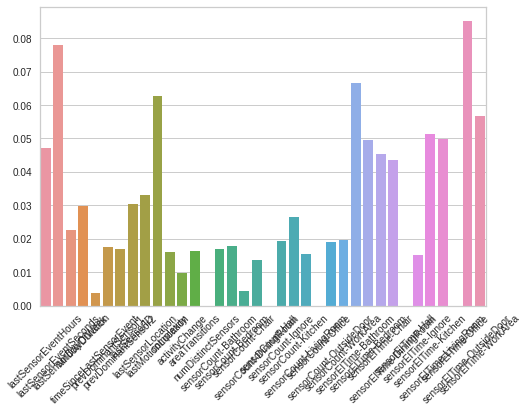

In [41]:
sns.barplot(x=X.columns, y=model.feature_importances_)
plt.xticks(rotation=45);


In [34]:
model.feature_importances_

array([0.04723122, 0.07806105, 0.02256967, 0.02981515, 0.00366776,
       0.01767531, 0.01683717, 0.03030084, 0.0331836 , 0.06272984,
       0.01613075, 0.00967049, 0.01634554, 0.        , 0.01685539,
       0.01794349, 0.0043292 , 0.01358848, 0.        , 0.01941044,
       0.02649343, 0.01536763, 0.        , 0.01896798, 0.01954611,
       0.06645858, 0.04960944, 0.04537139, 0.04351803, 0.        ,
       0.01528239, 0.05125521, 0.04996546, 0.        , 0.08513715,
       0.05668182])

In [38]:
X.columns

Index(['lastSensorEventHours', 'lastSensorEventSeconds', 'lastSensorDayOfWeek',
       'windowDuration', 'timeSinceLastSensorEvent', 'prevDominantSensor1',
       'prevDominantSensor2', 'lastSensorID', 'lastSensorLocation',
       'lastMotionLocation', 'complexity', 'activityChange', 'areaTransitions',
       'numDistinctSensors', 'sensorCount-Bathroom', 'sensorCount-Bedroom',
       'sensorCount-Chair', 'sensorCount-DiningRoom', 'sensorCount-Hall',
       'sensorCount-Ignore', 'sensorCount-Kitchen', 'sensorCount-LivingRoom',
       'sensorCount-Office', 'sensorCount-OutsideDoor', 'sensorCount-WorkArea',
       'sensorElTime-Bathroom', 'sensorElTime-Bedroom', 'sensorElTime-Chair',
       'sensorElTime-DiningRoom', 'sensorElTime-Hall', 'sensorElTime-Ignore',
       'sensorElTime-Kitchen', 'sensorElTime-LivingRoom',
       'sensorElTime-Office', 'sensorElTime-OutsideDoor',
       'sensorElTime-WorkArea'],
      dtype='object')

In [12]:
model = pickle.load(open('forest_sample_trained.pkl', 'rb'))
X, ytrue =  processing.load_house(105)
# ypred = model.predict(X)
# f1_score(ytrue, ypred, average='micro')

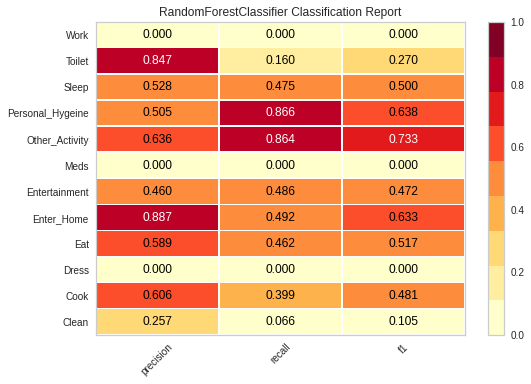

In [13]:
report = cf(model, X, ytrue, is_fitted=True)

In [18]:
import matplotlib.pyplot as plt

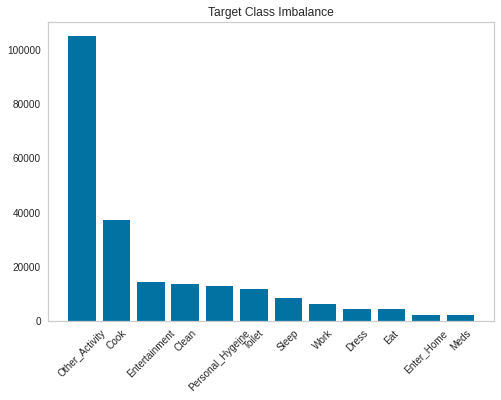

In [27]:
plt.bar(ytrue.value_counts().index, ytrue.value_counts())
plt.xticks(rotation=45 );
sns.despine
plt.title('Target Class Imbalance')
plt.grid(False)

In [ ]:
test_csvs = [101,120,123,113]
X_test = pd.DataFrame()
y_test = pd.Series()
for csv in test_csvs:
    X, y =  processing.load_house(csv)
    X_test = pd.concat([X_test, X])
    y_test = pd.concat([y_test, y])
    del X
    del y

<ipython-input-10-47174bd95ed4>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_test = pd.Series()
/home/dyllanjr/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [12]:
X_test2, y_test2 = processing.load_house(121)
ypred = forest.predict(X_test2)
print(classification_report(y_test2, ypred))

                   precision    recall  f1-score   support

            Clean       0.98      0.92      0.95     19232
             Cook       0.96      0.96      0.96     24517
            Dress       0.97      0.76      0.85     11984
              Eat       0.96      0.87      0.91      5592
       Enter_Home       0.96      0.70      0.81      1049
    Entertainment       0.89      0.80      0.84      5114
             Meds       0.99      0.69      0.82      1048
   Other_Activity       0.85      0.96      0.90     59910
 Personal_Hygeine       0.96      0.98      0.97     22632
            Sleep       0.93      0.85      0.89      2016
           Toilet       0.92      0.91      0.92      5482
             Work       0.96      0.78      0.86      8274
not_in_activities       0.97      0.59      0.73      2658

         accuracy                           0.91    169508
        macro avg       0.95      0.83      0.88    169508
     weighted avg       0.92      0.91      0.91    16

In [7]:
y_test2[y_test2 == 'not_in_activities']

2418      not_in_activities
2424      not_in_activities
2425      not_in_activities
2426      not_in_activities
2427      not_in_activities
                ...        
319430    not_in_activities
319431    not_in_activities
319432    not_in_activities
319433    not_in_activities
319434    not_in_activities
Name: reduced_activity, Length: 8901, dtype: object

In [9]:
X_test2.iloc[2418]

lastSensorEventHours           14.000000
lastSensorEventSeconds      50855.000000
lastSensorDayOfWeek             5.000000
windowDuration                 38.000000
timeSinceLastSensorEvent        0.000000
prevDominantSensor1             1.000000
prevDominantSensor2             1.000000
lastSensorID                    7.000000
lastSensorLocation              7.000000
lastMotionLocation              7.000000
complexity                      1.836641
activityChange                  0.500000
areaTransitions                 0.000000
numDistinctSensors              0.000000
sensorCount-Bathroom            0.000000
sensorCount-Bedroom             5.060000
sensorCount-Chair               0.000000
sensorCount-DiningRoom          0.000000
sensorCount-Hall                0.000000
sensorCount-Ignore             12.480000
sensorCount-Kitchen             0.000000
sensorCount-LivingRoom         11.990000
sensorCount-Office              0.000000
sensorCount-OutsideDoor         4.820000
sensorCount-Work

In [42]:
from sklearn.dummy import DummyClassifier

In [43]:
dummy = DummyClassifier()

In [44]:
dummy.fit(X, ytrue)

/home/dyllanjr/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier()

In [45]:
ypred= dummy.predict(X)
f1 = f1_score(ytrue, ypred, average='micro')

In [46]:
f1

0.2682745942350133